In [52]:
import matplotlib.pyplot as plt
from scipy import spatial
import numpy as np

from importlib import reload

%reload_ext autoreload
%autoreload 2

import pyturb
reload(pyturb)

from time import sleep, perf_counter

import gc

In [53]:
# Tools to generate turbulent velocity fields
turb = pyturb.CreateTurbulentVelocityField(grid_size=64,v_turb=10.,box_size=10,seed=143289)
# Tools to measure velocity fields
mturb = pyturb.MeasureVelocityField()
# Tools to generate gridded velocity fields given particle data
gt = pyturb.GriddingTools()


In [54]:
resolution = [32, 64, 128, 256]
seed = np.ones(len(resolution),dtype=np.int64)*turb.seed
vel_field = [None]*len(resolution)
vel_field_smooth = [None]*len(resolution)

for i,res in enumerate(resolution):
    print(f"Generating velocity field data at {res:d} mesh resolution")
    # Generate velocity field at desired resolution
    tstart=perf_counter()
    turb = pyturb.CreateTurbulentVelocityField(grid_size=res,v_turb=10.,box_size=10,seed=seed[i])    
    vel_field[i] = turb.generate_kolmogorov_field(energy_spectrum_index=5./3., energy_scale=1.0)
    tfinish=perf_counter()
    print(f"Finished generating velocity field in {tfinish-tstart:.4f}")
    # Generate a gridded version of the velocity field
    (vx,vy,vz) = (turb.vx.ravel(),turb.vy.ravel(),turb.vz.ravel())
    vel = np.stack([vx, vy, vz], axis=-1)
    (x,y,z) = (turb.X.ravel(),turb.Y.ravel(),turb.Z.ravel())
    pos = np.stack([x, y, z], axis=-1)
    grid_limits =  np.array([0,1,0,1,0,1], dtype=np.float64)*turb.box_size
    grid_size = (res,res,res)
    tstart=perf_counter()
    vel_field_smooth[i] = gt.smooth_to_grid(pos, vel, grid_size, grid_limits, method="CIC")
    tfinish=perf_counter()
    print(f"Finished smoothing velocity field from point data in {tfinish-tstart:.4f}\n")
    
print("Finished generating velocity fields")


Generating velocity field data at 32 mesh resolution
Finished generating velocity field in 0.0097
Finished smoothing velocity field from point data in 0.0086

Generating velocity field data at 64 mesh resolution
Finished generating velocity field in 0.0625
Finished smoothing velocity field from point data in 0.0678

Generating velocity field data at 128 mesh resolution
Finished generating velocity field in 0.6278
Finished smoothing velocity field from point data in 0.5489

Generating velocity field data at 256 mesh resolution
Finished generating velocity field in 7.1160
Finished smoothing velocity field from point data in 5.0043

Finished generating velocity fields


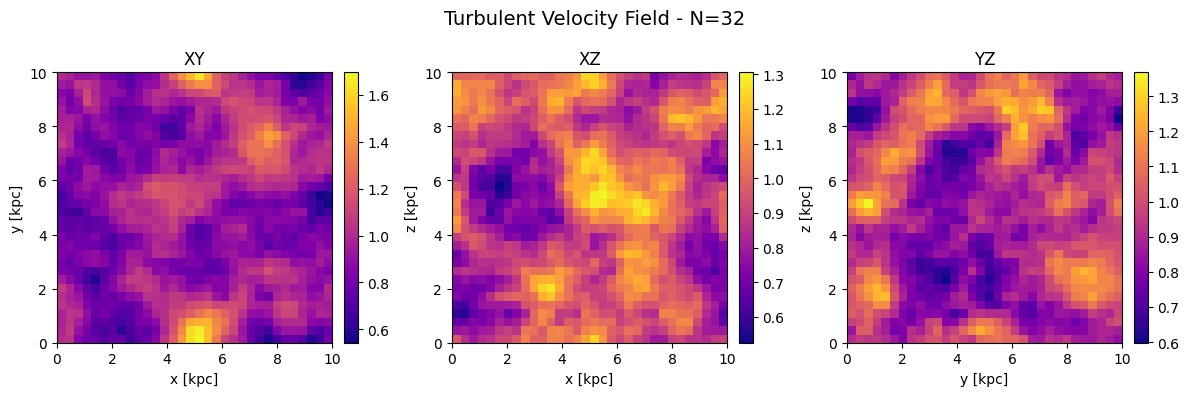

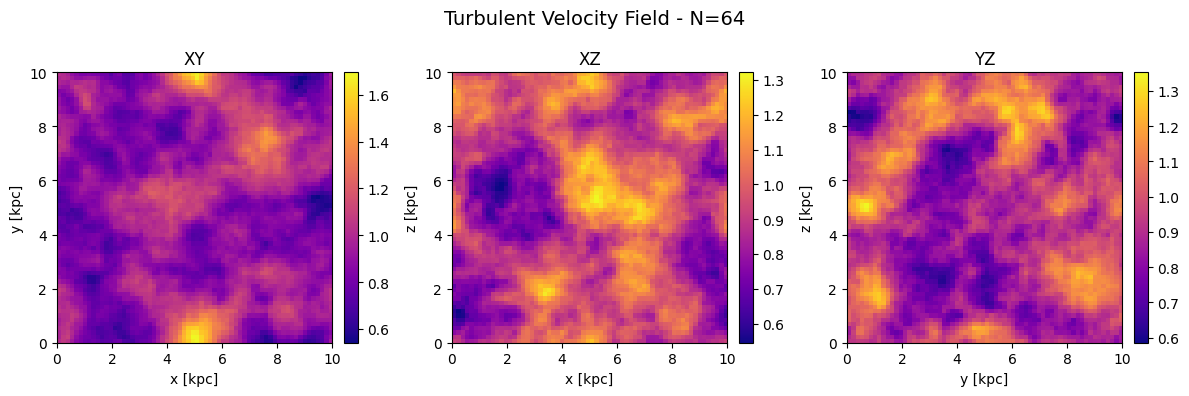

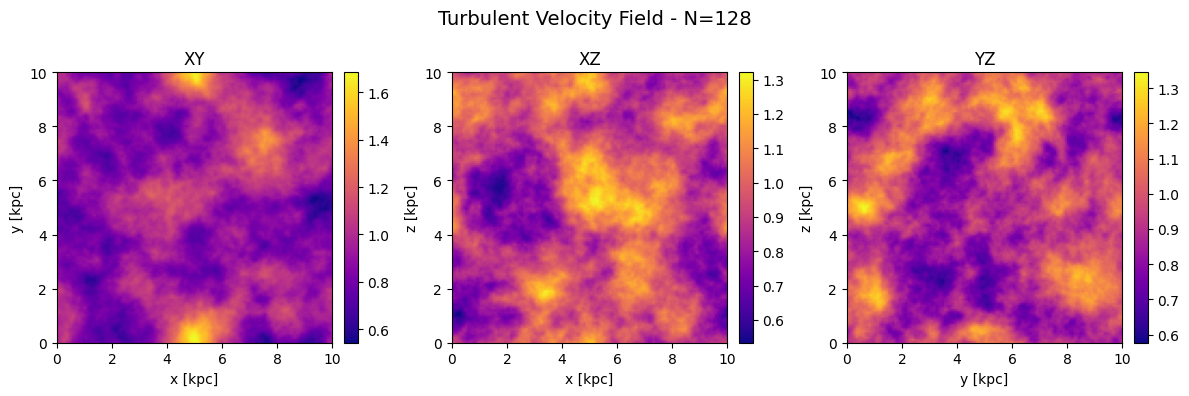

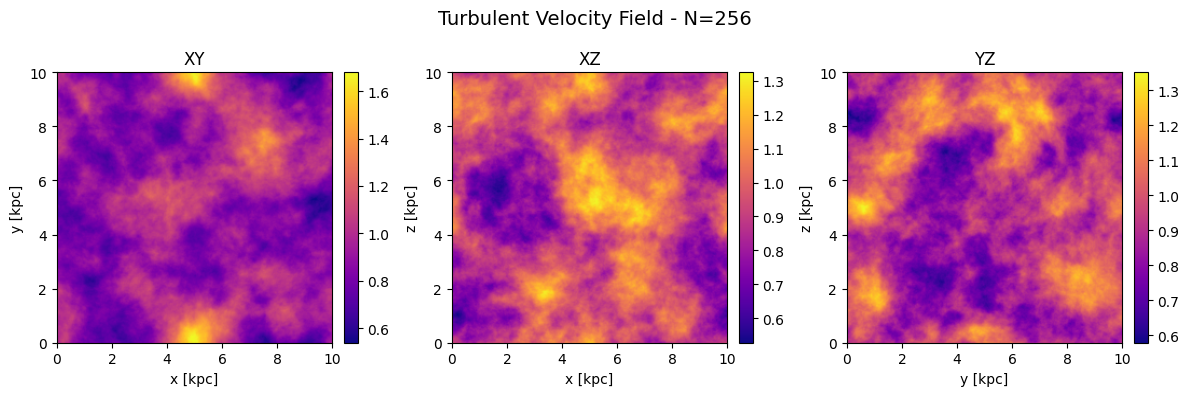

In [55]:
fig, axes = gt.plot_3d_projections(vel_field[0], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=32")
fig, axes = gt.plot_3d_projections(vel_field[1], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=64")
fig, axes = gt.plot_3d_projections(vel_field[2], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=128")
fig, axes = gt.plot_3d_projections(vel_field[3], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=256")

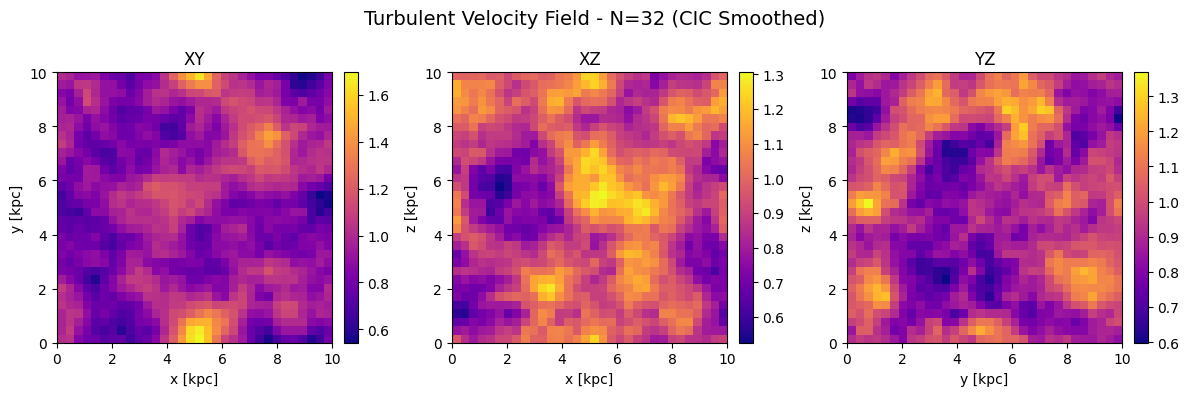

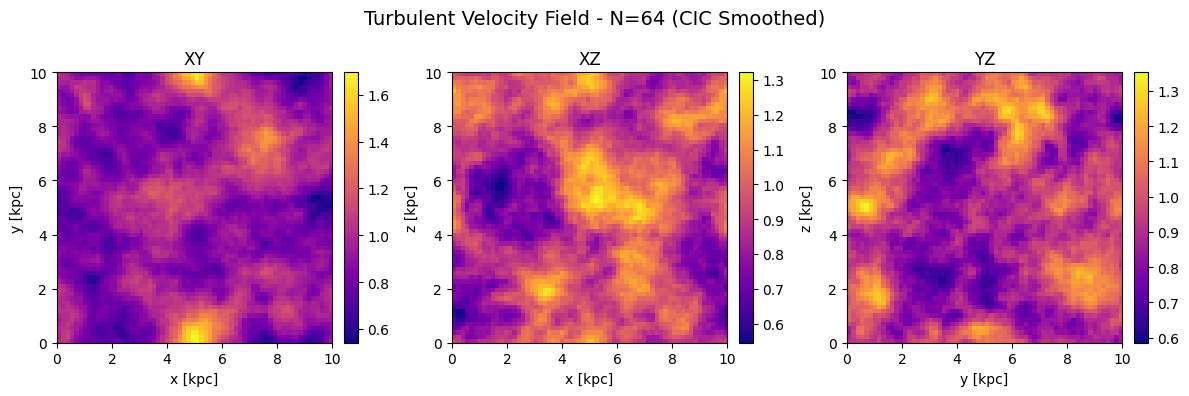

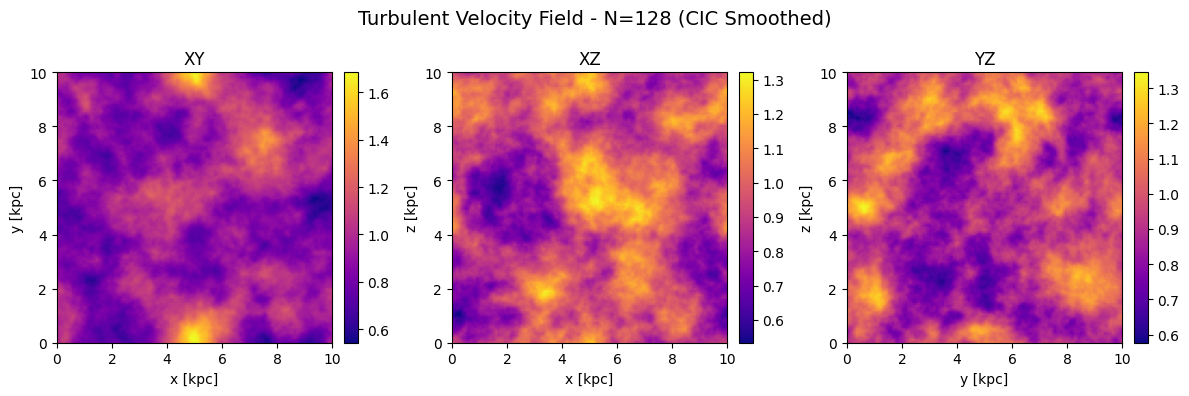

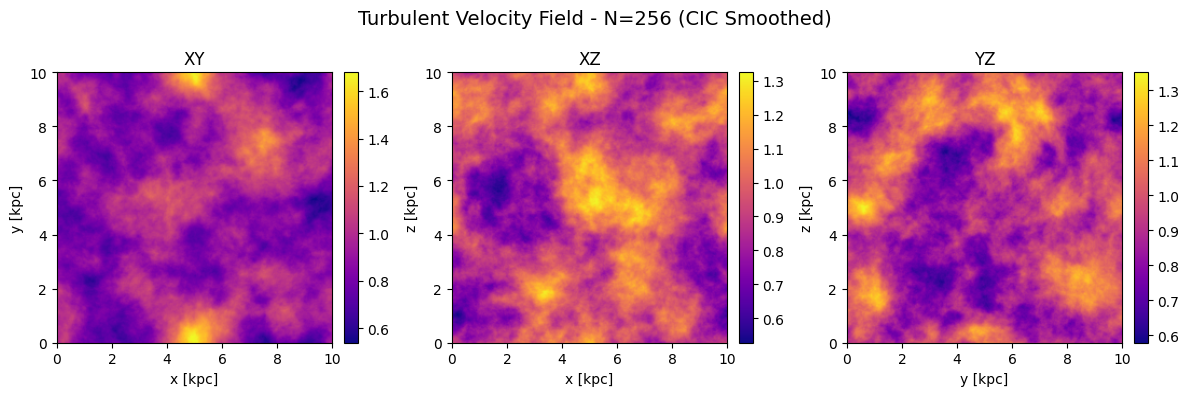

In [56]:
fig, axes = gt.plot_3d_projections(vel_field_smooth[0], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=32 (CIC Smoothed)")
fig, axes = gt.plot_3d_projections(vel_field_smooth[1], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=64 (CIC Smoothed)")
fig, axes = gt.plot_3d_projections(vel_field_smooth[2], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=128 (CIC Smoothed)")
fig, axes = gt.plot_3d_projections(vel_field_smooth[3], grid_limits, mode='projection', slice_width=3, projection='mean', cmap='plasma', units='kpc', title="Turbulent Velocity Field - N=256 (CIC Smoothed)")

In [57]:
# Compute for the velocity field generated by pyturb...
k0,pk0,_=mturb.compute_power_spectrum(vel_field[0], box_size=turb.box_size, component='energy', method='radial')
# ... and compute for the velocity field constructed from the positions and velocities
k1,pk1,_=mturb.compute_power_spectrum(vel_field[1], box_size=turb.box_size, component='energy', method='radial')
# ... and compute for the velocity field constructed from the positions and velocities
k2,pk2,_=mturb.compute_power_spectrum(vel_field[2], box_size=turb.box_size, component='energy', method='radial')
# ... and compute for the velocity field constructed from the positions and velocities
k3,pk3,_=mturb.compute_power_spectrum(vel_field[3], box_size=turb.box_size, component='energy', method='radial')


32768
1.5739386107910007 1.5739386107910007
262144
1.5811106565673738 1.581110656567375
2097152
1.584871008904771 1.584871008904771
16777216
1.5872113455305639 1.587211345530559


In [59]:
# Compute for the velocity field generated by pyturb...
ks0,pks0,_=mturb.compute_power_spectrum(vel_field_smooth[0], box_size=turb.box_size, component='energy', method='radial')
# ... and compute for the velocity field constructed from the positions and velocities
ks1,pks1,_=mturb.compute_power_spectrum(vel_field_smooth[1], box_size=turb.box_size, component='energy', method='radial')
# ... and compute for the velocity field constructed from the positions and velocities
ks2,pks2,_=mturb.compute_power_spectrum(vel_field_smooth[2], box_size=turb.box_size, component='energy', method='radial')
# ... and compute for the velocity field constructed from the positions and velocities
ks3,pks3,_=mturb.compute_power_spectrum(vel_field_smooth[3], box_size=turb.box_size, component='energy', method='radial')

32768
1.5739386107910007 1.5739386107910007
262144
1.5811106565673738 1.581110656567375
2097152
1.584871008904771 1.584871008904771
16777216
1.5872113455305639 1.587211345530559


Measured power law slope: -3.669
Expected slope (Kolmogorov): -3.667
Difference: 0.003


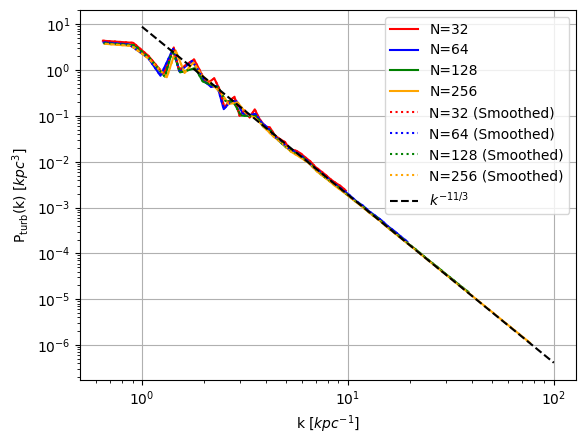

In [74]:
plt.xlabel(r"k [$kpc^{-1}$]")
plt.ylabel(r"P$_\text{turb}$(k) [$kpc^{3}$]")
plt.xscale("log")
plt.yscale("log")
plt.plot(k0,pk0,color="red",label="N=32")
plt.plot(k1,pk1,color="blue",label="N=64")
plt.plot(k2,pk2,color="green",label="N=128")
plt.plot(k3,pk3,color="orange",label="N=256")

plt.plot(ks0,pks0,":",color="red",label="N=32 (Smoothed)")
plt.plot(ks1,pks1,":",color="blue",label="N=64 (Smoothed)")
plt.plot(ks2,pks2,":",color="green",label="N=128 (Smoothed)")
plt.plot(ks3,pks3,":",color="orange",label="N=256 (Smoothed)")

plt.grid(True)
plt.legend()

fit_mask = (k3 > 20) & (k3 < 30)
if np.any(fit_mask):
    log_k_fit = np.log10(k3[fit_mask])
    log_P_fit = np.log10(pk3[fit_mask])
    slope, intercept = np.polyfit(log_k_fit, log_P_fit, 1)

print(f"Measured power law slope: {slope:.3f}")
print(f"Expected slope (Kolmogorov): {-11/3:.3f}")
print(f"Difference: {abs(slope + 11/3):.3f}")
    
# Add theoretical line
k_theory = np.logspace(0, 2, 50)
P_theory = k_theory**(-11/3)
pk3_30=np.interp(k_theory[30],k3,pk3)
P_theory *= pk3_30 / P_theory[30]  # Normalize
plt.plot(k_theory, P_theory, '--', color='black', label=r'$k^{-11/3}$')
plt.legend()



In [75]:
turb.write_to_file("./turbulent_ics.hdf5")


Created 16777216 particles
Box size: 10 pc
Mean density: 1.0 H/cm^3
Initial temperature: 10000.0 K
Initial conditions written to ./turbulent_ics.hdf5
